In [ ]:
# gendeg : 1 for female and 2 for male
# height in cm , weight in kg(float)
# ap_hi : upper bp or systolic bp
# ap_lo : diastolic bp or lower bp

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
# 1. read the database
df = pd.read_csv("cardio_train.csv", sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


TASK 1

In [82]:

# 2. summary of database
print("\n....row and column...")
print(df.shape)

print("\n...first 5 row...")
print(df.head())

print("\n...all data information...")
print(df.info())

print("\n...all data short describlestion..")
print(df.describe())

print("\n...all row data type...")
print(df.dtypes)



....row and column...
(70000, 13)

...first 5 row...
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

...all data information...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2  

data preprocessing

TASK 2

In [86]:
#missing values
print(f"missing values :\n {df.isnull().sum()}")

missing values :
 id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [88]:
df['age'] = (df['age'] / 365).astype(int)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [90]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [92]:
df.duplicated().sum()

0

In [94]:
#id  column is drop btw this column is not useful
df = df.drop("id",axis=1)

In [96]:

#handle outliers 
df = df[(df['ap_hi'] >=50) & (df['ap_hi'] <=250)]
df = df[(df['ap_lo']>= 30) & (df['ap_lo'] <=150)]
df = df[df['ap_hi'] >= df['ap_lo']]


In [98]:
print(df.columns)

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [100]:
df.duplicated().sum()

3206

In [102]:
#remove duplicate
df.drop_duplicates(inplace=True)

In [104]:
df.shape

(65469, 12)

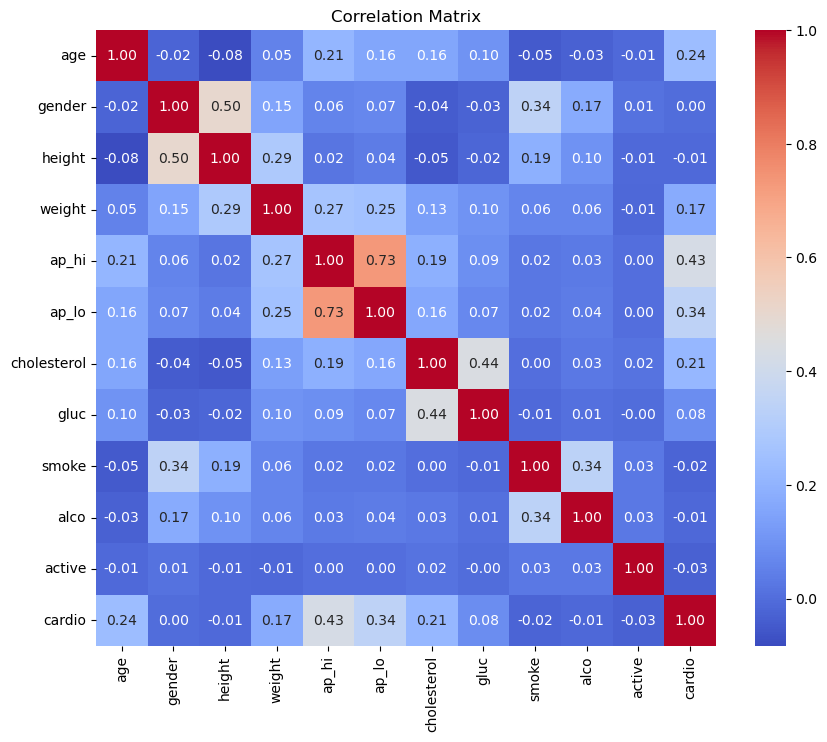

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [108]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [109]:
outliers = ((df < (Q1 - 1.5 * IQR)) | 
            (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)


age                4
gender             0
height           505
weight          1745
ap_hi           1006
ap_lo           3491
cholesterol        0
gluc           10239
smoke           6026
alco            3660
active         13222
cardio             0
dtype: int64


In [110]:
df = df[~((df < (Q1 - 1.5 * IQR)) | 
          (df > (Q3 + 1.5 * IQR))).any(axis=1)]


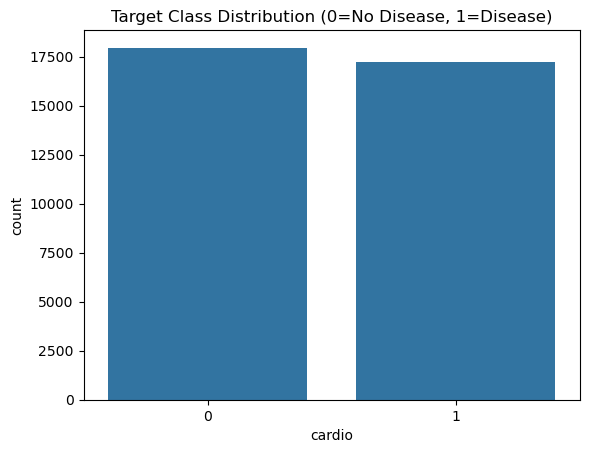

Data Cleaning Complete. Final Shape: (35151, 12)


In [115]:
sns.countplot(x='cardio', data=df)
plt.title("Target Class Distribution (0=No Disease, 1=Disease)")
plt.show()

print("Data Cleaning Complete. Final Shape:", df.shape)

TASK 3

In [119]:
x = df.drop("cardio",axis=1)
y= df["cardio"]

In [121]:
from sklearn.model_selection import train_test_split

In [123]:
import pickle

In [125]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size =0.2 , random_state=42)

DecisionTreeClassifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

In [137]:
model = DecisionTreeClassifier (max_depth = 5 , random_state=42)
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test , y_pred)
print("Accuracy:",accuracy)

cm = confusion_matrix(y_test , y_pred)
print("Confusion Matrix :")
print(cm)

train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train , train_pred)

print("Training Accuracy : ",train_accuracy)
print("Testing Accuracy :",accuracy)

Accuracy: 0.7344616697482577
Confusion Matrix :
[[2844  726]
 [1141 2320]]
Training Accuracy :  0.7300142247510668
Testing Accuracy : 0.7344616697482577


RandomForestClassifier

In [124]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(
#     n_estimators=200,
#     max_depth=5,
#     random_state=42
# )
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("\nRandom Forest Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# print("Random Forest Confusion Matrix:\n", cm)

# train_pred = model.predict(x_train)
# train_accuracy = accuracy_score(y_train, train_pred)

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", accuracy)



Random Forest Accuracy: 0.7294837149765325
Random Forest Confusion Matrix:
 [[2915  655]
 [1247 2214]]
Training Accuracy: 0.7276315789473684
Testing Accuracy: 0.7294837149765325


LogisticRegression

In [127]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(max_iter=1000)
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("\nLogistic Regression Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# print("Logistic Regression Confusion Matrix:\n", cm)

# train_pred = model.predict(x_train)
# train_accuracy = accuracy_score(y_train, train_pred)

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", accuracy)



Logistic Regression Accuracy: 0.7313326696060304
Logistic Regression Confusion Matrix:
 [[2891  679]
 [1210 2251]]
Training Accuracy: 0.7231152204836415
Testing Accuracy: 0.7313326696060304


KNeighborsClassifier

In [45]:
# from sklearn.preprocessing import StandardScaler

In [47]:

# scaler = StandardScaler()
# x_train_s = scaler.fit_transform(x_train)
# x_test_s = scaler.transform(x_test)


In [134]:
# from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors=3)
# model.fit(x_train_s, y_train)

# y_pred = model.predict(x_test_s)

# accuracy = accuracy_score(y_test, y_pred)
# print("\nKNN Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# print("KNN Confusion Matrix:\n", cm)

# train_pred = model.predict(x_train_s)
# train_accuracy = accuracy_score(y_train, train_pred)

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", accuracy)



KNN Accuracy: 0.6696060304366378
KNN Confusion Matrix:
 [[2456 1114]
 [1209 2252]]
Training Accuracy: 0.8130867709815078
Testing Accuracy: 0.6696060304366378


In [63]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [61]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
# model = model = XGBClassifier(
#     n_estimators=200,
#     max_depth=3,
#     learning_rate=0.1,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='logloss'
# )
# model.fit(x_train_s, y_train)

# y_pred = model.predict(x_test_s)

# accuracy = accuracy_score(y_test, y_pred)
# print("\nKNN Accuracy:", accuracy)

# cm = confusion_matrix(y_test, y_pred)
# print("KNN Confusion Matrix:\n", cm)

# train_pred = model.predict(x_train_s)
# train_accuracy = accuracy_score(y_train, train_pred)

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", accuracy)

D:\Anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:32:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



KNN Accuracy: 0.7348403849091186
KNN Confusion Matrix:
 [[4978 1529]
 [1943 4644]]
Training Accuracy: 0.7344916467780429
Testing Accuracy: 0.7348403849091186


In [154]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error

# model = LinearRegression()
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)
# print(r2_score(y_test, y_pred))

# # Training predictions
# y_train_pred = model.predict(x_train)

# # R2 scores
# train_acc = r2_score(y_train, y_train_pred)
# train_acc

0.2508509980670064


0.23293603650283978

In [139]:
with open ('model.pkl','wb') as file:
    pickle.dump(model,file)
print("Model saved as model.pkl")

Model saved as model.pkl
